<a href="https://colab.research.google.com/github/YunHo0325/ai_lecture/blob/main/src/mnist_cnn_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.color import gray2rgb, label2rgb
from skimage.segmentation import mark_boundaries
%matplotlib inline

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
def cnnModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                    activation='relu',
                    input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = np.stack([gray2rgb(iimg) for iimg in x_train], 0)
x_test = np.stack([gray2rgb(iimg) for iimg in x_test], 0)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.3, 
                                                  random_state=2020)

In [ ]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_val_oh = tf.keras.utils.to_categorical(y_val)
y_test_oh = tf.keras.utils.to_categorical(y_test)

## epoch 별 정확도 비교

- epoch : 5

In [ ]:
tf.keras.backend.clear_session()    # 세션 초기화
model = cnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
# 모델 훈련
epoch = 5
history = model.fit(x_train, y_train_oh, 
                    epochs=epoch,
                    validation_data=(x_val, y_val_oh))

Epoch 1/5
1313/1313 [==============================] - 24s 7ms/step - loss: 0.1601 - accuracy: 0.9506 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 5/5
1313/1313 [==============================] - 9s 6ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0362 - val_accuracy: 0.9899


In [ ]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9918


[0.0268934927880764, 0.9918000102043152]

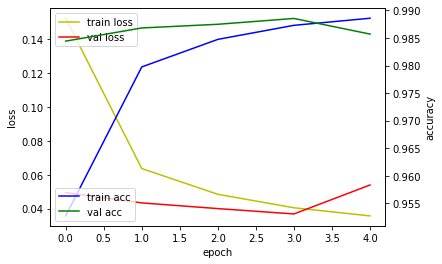

In [ ]:
loss, acc, val_loss, val_acc  = history.history.values()

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

- epoch : 10

In [ ]:
tf.keras.backend.clear_session()    # 세션 초기화
model = cnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
# 모델 훈련
epoch = 10
history = model.fit(x_train, y_train_oh, 
                    epochs=epoch,
                    validation_data=(x_val, y_val_oh))

Epoch 1/10
1313/1313 [==============================] - 101s 77ms/step - loss: 0.1478 - accuracy: 0.9530 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 2/10
1313/1313 [==============================] - 100s 76ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0480 - val_accuracy: 0.9854
Epoch 3/10
1313/1313 [==============================] - 99s 76ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0342 - val_accuracy: 0.9897
Epoch 4/10
1313/1313 [==============================] - 99s 76ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0454 - val_accuracy: 0.9867
Epoch 5/10
1313/1313 [==============================] - 99s 75ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 6/10
1313/1313 [==============================] - 103s 78ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0415 - val_accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 102s 77ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.03

In [ ]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 6s 20ms/step - loss: 0.0367 - accuracy: 0.9904


[0.036723777651786804, 0.9904000163078308]

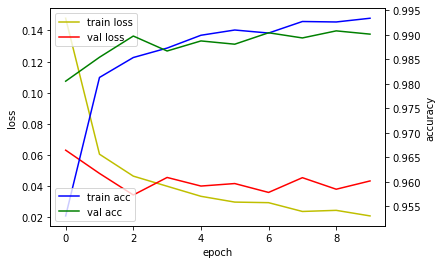

In [ ]:
loss, acc, val_loss, val_acc  = history.history.values()

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

- epoch : 50

In [ ]:
tf.keras.backend.clear_session()    # 세션 초기화
model = cnnModel()

# 모델 컴파일 : loss = 'categorical_crossentropy'
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
# 모델 훈련
epoch = 50
history = model.fit(x_train, y_train_oh, 
                    epochs=epoch,
                    validation_data=(x_val, y_val_oh))

Epoch 1/50
1313/1313 [==============================] - 104s 78ms/step - loss: 0.1522 - accuracy: 0.9515 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 2/50
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 3/50
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 4/50
1313/1313 [==============================] - 103s 78ms/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0332 - val_accuracy: 0.9903
Epoch 5/50
1313/1313 [==============================] - 105s 80ms/step - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 6/50
1313/1313 [==============================] - 103s 78ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0410 - val_accuracy: 0.9886
Epoch 7/50
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0

In [ ]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 6s 20ms/step - loss: 0.0540 - accuracy: 0.9916


[0.053965263068675995, 0.991599977016449]

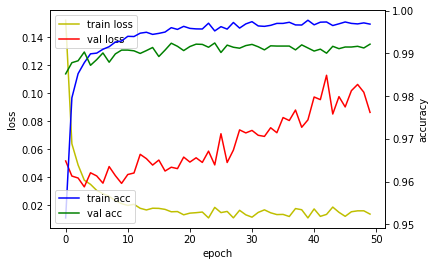

In [ ]:
loss, acc, val_loss, val_acc  = history.history.values()

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

- 예측값 확인

In [ ]:
pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
pred_dic = dict()
pred_cnt_dic = dict()
for i in range(10):
    pred_cnt_dic[i] = 0
    pred_dic[i] = []

for p, a in zip(pred, y_test):
    if p != a:
        pred_cnt_dic[a] += 1
        pred_dic[a].append(p)

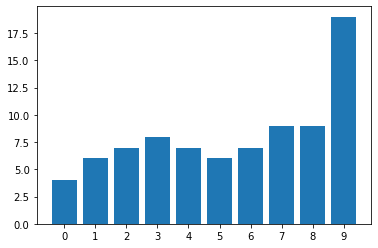

In [ ]:
plt.bar(list(pred_cnt_dic.keys()), list(pred_cnt_dic.values()))
plt.xticks(list(pred_cnt_dic.keys()))
plt.show()

In [ ]:
pred_dic

In [ ]:
for i in range(10):
    uniq = np.unique(pred_dic[i], return_counts=True)
    plt.bar(uniq[0], uniq[1])
    plt.xticks(range(10))
    plt.title(f"answer {i}")
    plt.show()

# LIME

In [ ]:
def predict(data):
    data = data.reshape(-1, 28, 28, 3)
    pred = model.predict(data)
    return pred

In [ ]:
explainer = lime_image.LimeImageExplainer()

# 이미지 분할 알고리즘 : quickshift(기본), slic, felzenszwalb
segmenter = SegmentationAlgorithm('slic',
                                 n_segments=100,
                                 compactness=1,
                                 sigma=1)

In [ ]:
idx= 1
exp = explainer.explain_instance(x_test[idx],
                                 classifier_fn=predict,
                                 top_labels=10,
                                 num_samples=500,
                                 segmentation_fn=segmenter
                                )

/usr/local/lib/python3.7/dist-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


  0%|          | 0/500 [00:00<?, ?it/s]

class : 2, pred : 2


Text(0.5, 1.0, 'Show mask only')

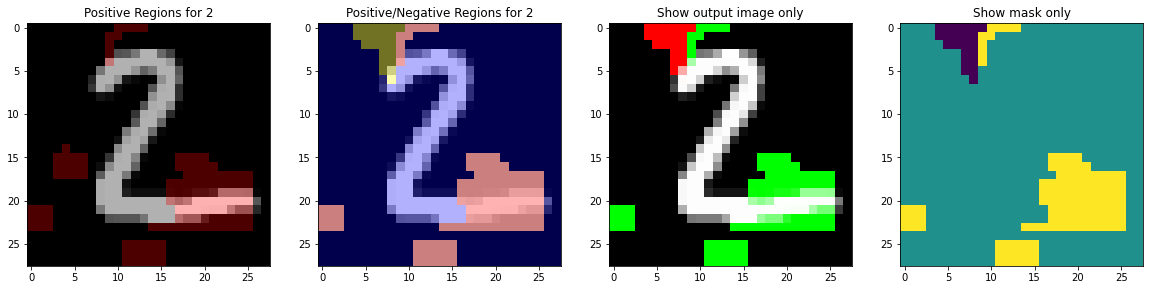

In [ ]:
print(f"class : {y_test[idx]}, pred : {np.argmax(predict(x_test[idx]))}")
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 20))

# 에측에 도움이 되는 세그먼트 출력
temp, mask = exp.get_image_and_mask(y_test[idx], 
                                   positive_only=True,
                                   num_features=8,
                                   hide_rest=False)
# ax1.imshow(mark_boundaries(temp, mask))
ax1.imshow(label2rgb(mask, temp, bg_label = 0),
          interpolation = 'nearest')
ax1.set_title(f'Positive Regions for {y_test[idx]}')

# 모든 세그먼트 출력
temp, mask = exp.get_image_and_mask(y_test[idx], 
                                   positive_only=False,
                                   num_features=8,
                                   hide_rest=False)
# ax2.imshow(mark_boundaries(temp, 4-mask))
ax2.imshow(label2rgb(4-mask, temp, bg_label = 0),
          interpolation = 'nearest')
ax2.set_title(f'Positive/Negative Regions for {y_test[idx]}')

# 이미지만 출력
ax3.imshow(temp, interpolation='nearest')
ax3.set_title('Show output image only')

# 마스크만 출력
ax4.imshow(mask, interpolation = 'nearest')
ax4.set_title('Show mask only')